<a href="https://colab.research.google.com/github/Seung-gyuu/data-science-project-2/blob/main/UShousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install ipywidgets
!pip install tqdm


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-CD0198EN-SkillsNetwork/labs/data/Annual_Macroeconomic_Factors.csv'
filename = 'Annual_Macroeconomic_Factors.csv'

response = requests.get(url)

if response.status_code == 200:
    with open(filename, 'wb') as f:
        f.write(response.content)
    print("Download complete! File saved as:", filename)
else:
    print("Download failed with status code:", response.status_code)


✅ Download complete! File saved as: Annual_Macroeconomic_Factors.csv


In [8]:
df = pd.read_csv(filename)
df.size
df.head(3)

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.090,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908
1,1976-01-01,65.525,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346
2,1977-01-01,73.435,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780


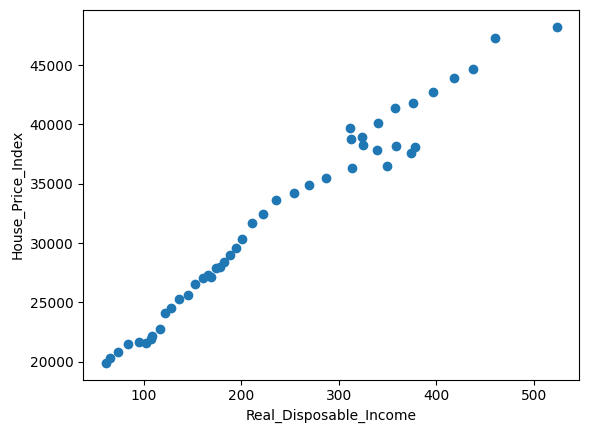

In [10]:
#Plot a scatter plot between House_Price_Index and Real_Disposable_Income

plt.scatter(data= df, y='Real_Disposable_Income', x= 'House_Price_Index')
plt.xlabel("Real_Disposable_Income")
plt.ylabel("House_Price_Index")
plt.show()

## The scatter plot indicates a strong, approximately linear positive correlation between real disposable income and house price index.
# This suggests that higher income levels are associated with higher house prices, implying that income growth may be a key driver of housing market trends.

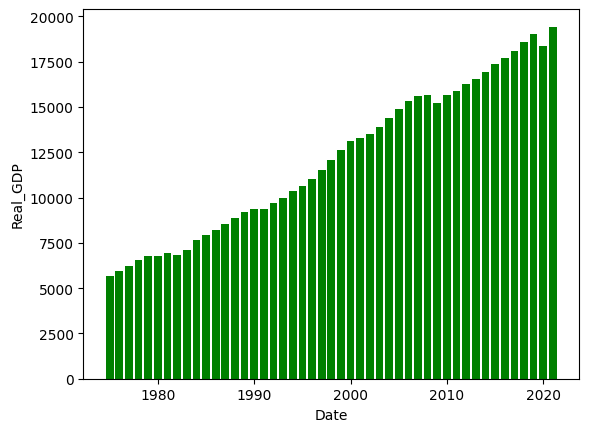

In [11]:
# Create a bar chart with date (as year) on X-axis and Real_GDP on the Y-axis

x=pd.DatetimeIndex(df['Date']).year
y=df['Real_GDP']
plt.bar(x,y,color ='green')
plt.xlabel("Date")
plt.ylabel("Real_GDP")
plt.show()

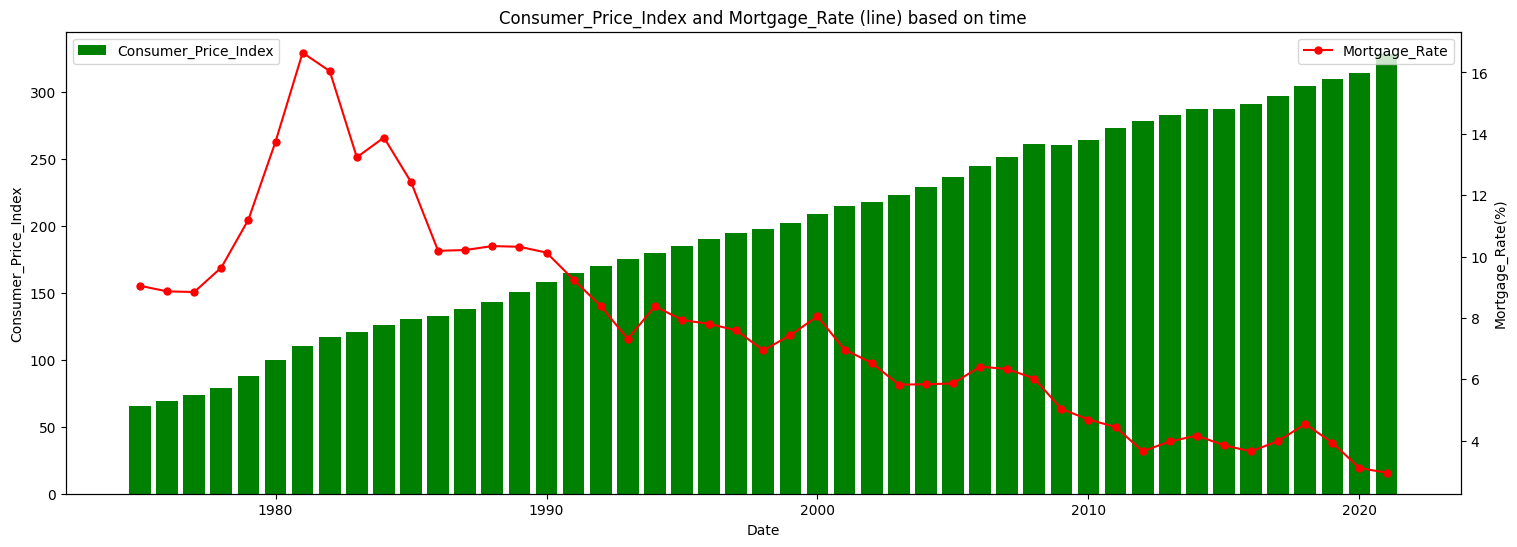

In [12]:
# Create a combo chart with date on X-axis and Consumer_Price_Index on Y1-axis (bar) and Mortgage_Rate (line) on Y2-axis

fig, ax1 = plt.subplots(figsize=(18, 6))
x=pd.DatetimeIndex(df['Date']).year
y1 =df['Consumer_Price_Index']
y2= df['Mortgage_Rate']

ax2 = ax1.twinx()
ax1.bar( x, y1, color = "green", label = "Consumer_Price_Index" )
ax2.plot(x, y2, color = "red", marker =".", markersize = 10, label="Mortgage_Rate")

plt.title("Consumer_Price_Index and Mortgage_Rate (line) based on time")
ax1.legend(loc= "upper left")
ax2.legend(loc= "upper right")
ax1.set_xlabel("Date")
ax1.set_ylabel("Consumer_Price_Index")
ax2.set_ylabel("Mortgage_Rate(%)")
plt.show()


# From 1980 to 2020, the mortgage rate showed a declining trend,
# while the consumer price index continued to rise steadily.

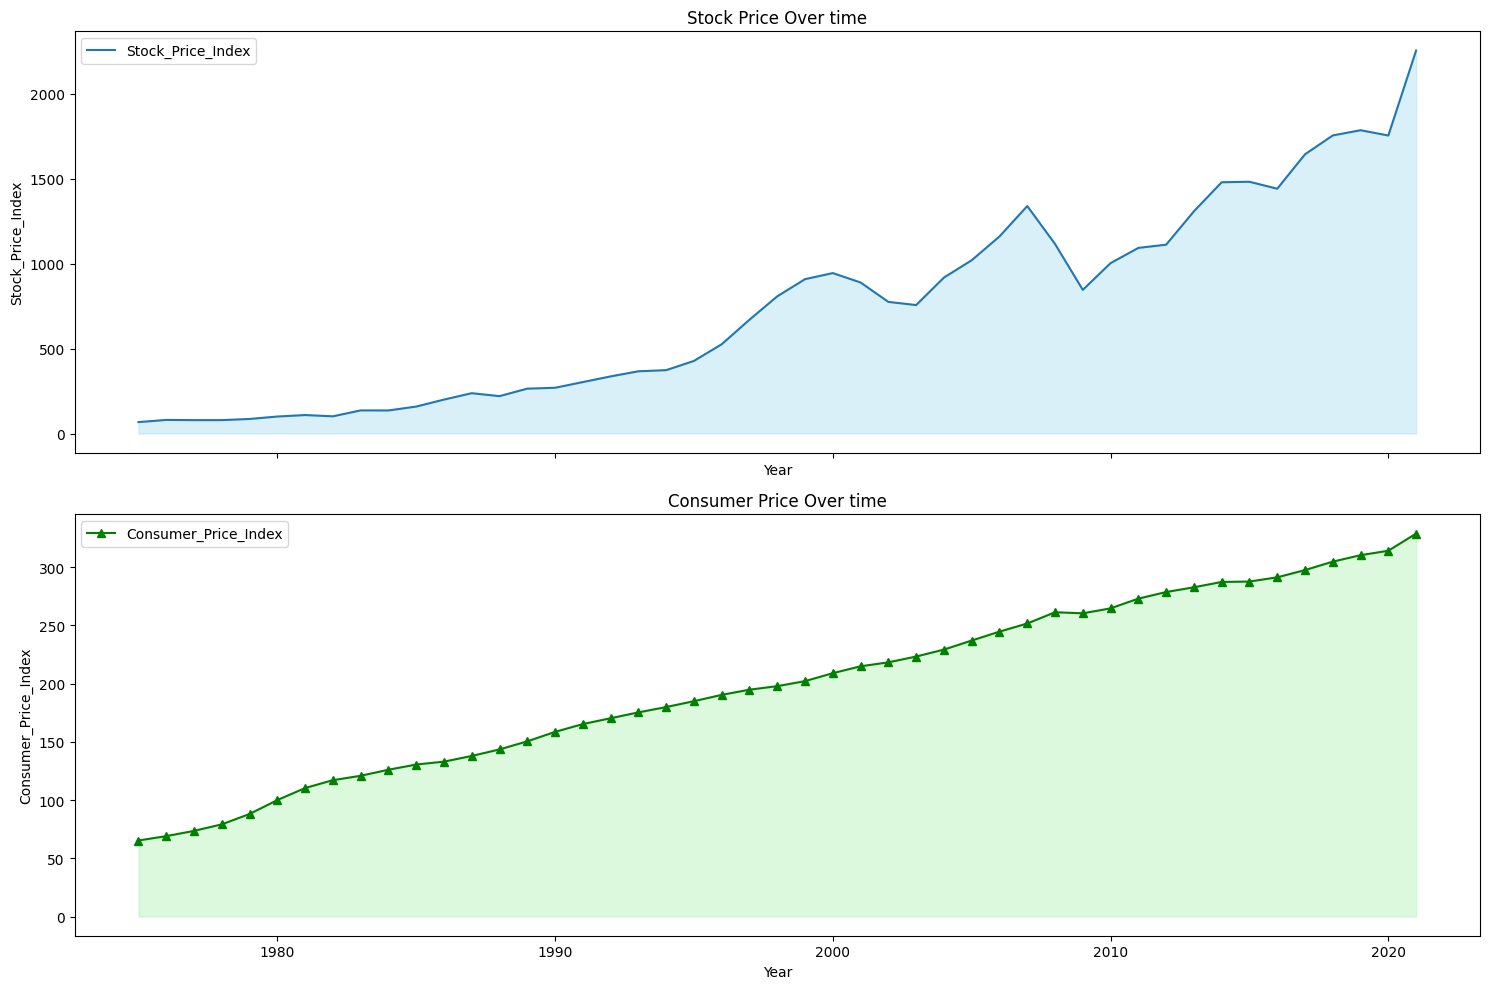

In [14]:
# Create sub-plots with Date on X-axis and Stock_Price_Index on subplot 1 and Consumer_Price_Index on subplot 2

x0=pd.DatetimeIndex(df["Date"]).year
y1=df["Stock_Price_Index"]
y2 = df["Consumer_Price_Index"]

plt.subplots(2, 1, sharex=True, figsize=(15, 10))
plt.subplot(2,1,1)
plt.plot(x0,y1, label="Stock_Price_Index")
plt.legend(loc="upper left")
plt.title("Stock Price Over time")
plt.xlabel("Year")
plt.ylabel("Stock_Price_Index")
plt.fill_between(x0, y1, color='skyblue', alpha=0.3)

plt.subplot(2,1,2)
plt.plot(x0,y2, label="Consumer_Price_Index", marker="^", color="green")
plt.legend(loc="upper left")
plt.title("Consumer Price Over time")
plt.xlabel("Year")
plt.ylabel("Consumer_Price_Index")
plt.fill_between(x0, y2, color='lightgreen', alpha=0.3)


plt.tight_layout()
plt.show()


#Over the observed period, both the Stock Price Index and the Consumer Price Index steadily increased,
#suggesting that stock market performance and consumer prices have generally risen in parallel.